In [21]:
import cv2
import numpy as np

# Load the image and convert it to grayscale
image = cv2.imread('./checker_image.jpg')

# 원래 이미지의 너비와 높이 얻기
width, height = image.shape[1], image.shape[0]

# 이미지의 크기 조절
image = cv2.resize(image, (int(width/4), int(height/4)))

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

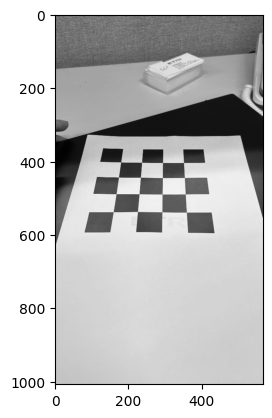

In [22]:
import matplotlib.pyplot as plt

plt.imshow(gray,cmap='gray')

In [23]:
# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (4,4), None)
print(ret,corners)

True [[[180.00288 404.0018 ]]

 [[236.89331 404.89117]]

 [[293.9747  405.4896 ]]

 [[351.17166 405.46146]]

 [[174.03806 445.0557 ]]

 [[233.41231 445.53293]]

 [[293.50763 446.49652]]

 [[353.5002  446.26144]]

 [[167.31544 490.52167]]

 [[229.95226 490.58762]]

 [[292.74536 491.40393]]

 [[355.9205  491.07504]]

 [[159.477   539.49976]]

 [[225.40466 538.9732 ]]

 [[292.00897 539.7572 ]]

 [[358.72632 540.47876]]]


In [24]:
if ret == True:
    # Perform camera calibration (assuming square grid)
    objpoints = []  # 3d points in real world space
    imgpoints = []  # 2d points in image plane.
    
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
    
    # 변경: objp 배열의 크기를 4*4로 설정합니다.
    objp = np.zeros((4*4,3), np.float32)
    objp[:,:2] = np.mgrid[0:4,0:4].T.reshape(-1,2)
    
    objpoints.append(objp)
    imgpoints.append(corners)
    
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    
    # Define the vertices of a cube
    cube_verts = np.float32([[0,0,0], [0,1,0], [1,1,0], [1,0,0],
                             [0,0,-1],[0,1,-1],[1,1,-1],[1,0,-1]])
    
    # Project 3D points to 2D image plane
    imgpts, jac = cv2.projectPoints(cube_verts, rvecs[0], tvecs[0], mtx, dist)
    
    # Draw the cube
    img = image.copy()
    img = cv2.drawChessboardCorners(img, (4,4), corners, True)
    img = cv2.drawContours(img, [imgpts[:4].astype(int)],-1,(0,255,0),-3)
    for i,j in zip(range(4),range(4,8)):
        img = cv2.line(img, tuple(imgpts[i].ravel().astype(int)), tuple(imgpts[j].ravel().astype(int)),(255),3)
    img = cv2.drawContours(img, [imgpts[4:].astype(int)],-1,(0,0,255),3)
    
    # Display the image
    cv2.imshow('AR Cube', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [25]:
ret

0.43193981507839974